# Airline Flight Data Analysis

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [2]:
airline_data = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")

In [3]:
airline_data.head(10)

index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   
5      5   Vistara   UK-945       Delhi        Morning  zero      Afternoon   
6      6   Vistara   UK-927       Delhi        Morning  zero        Morning   
7      7   Vistara   UK-951       Delhi      Afternoon  zero        Evening   
8      8  GO_FIRST   G8-334       Delhi  Early_Morning  zero        Morning   
9      9  GO_FIRST   G8-336       Delhi      Afternoon  zero        Evening   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
5           Mumbai  Economy      2.33          1   5955  
6           Mumbai  Economy      2.08          1   6060  
7           Mumbai  Economy      2.17          1   6060  
8           Mumbai  Economy      2.17          1   5954  
9           Mumbai  Economy      2.25          1   5954

Data Cleaning

In [4]:
#Dropping the index column from the dataset

airline_data.drop(columns="index", inplace = True)

In [5]:
airline_data.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [6]:
#Getting more information about the dataset

airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
#Getting the statistical summary of the dataset

airline_data.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

In [9]:
airline_data[airline_data["duration"] == 2.17]

airline   flight source_city departure_time stops   arrival_time  \
0        SpiceJet  SG-8709       Delhi        Evening  zero          Night   
2         AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
7         Vistara   UK-951       Delhi      Afternoon  zero        Evening   
8        GO_FIRST   G8-334       Delhi  Early_Morning  zero        Morning   
12         Indigo  6E-5001       Delhi  Early_Morning  zero        Morning   
...           ...      ...         ...            ...   ...            ...   
293141  Air_India   AI-672     Chennai      Afternoon  zero        Evening   
293195  Air_India   AI-672     Chennai      Afternoon  zero        Evening   
293246  Air_India   AI-672     Chennai      Afternoon  zero        Evening   
293299  Air_India   AI-672     Chennai      Afternoon  zero        Evening   
293348  Air_India   AI-672     Chennai      Afternoon  zero        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
2                Mumbai   Economy      2.17          1   5956  
7                Mumbai   Economy      2.17          1   6060  
8                Mumbai   Economy      2.17          1   5954  
12               Mumbai   Economy      2.17          1   5955  
...                 ...       ...       ...        ...    ...  
293141           Mumbai  Business      2.17         45  23424  
293195           Mumbai  Business      2.17         46  23424  
293246           Mumbai  Business      2.17         47  23424  
293299           Mumbai  Business      2.17         48  23424  
293348           Mumbai  Business      2.17         49  23424  

[4242 rows x 11 columns]

In [12]:
airline_data[airline_data["duration"] == 0.83]

airline   flight source_city departure_time stops   arrival_time  \
115869  Indigo   6E-357   Bangalore          Night  zero          Night   
115943  Indigo   6E-357   Bangalore          Night  zero          Night   
116010  Indigo   6E-357   Bangalore          Night  zero          Night   
116081  Indigo   6E-357   Bangalore          Night  zero          Night   
116163  Indigo   6E-357   Bangalore          Night  zero          Night   
116236  Indigo   6E-357   Bangalore          Night  zero          Night   
116322  Indigo   6E-357   Bangalore          Night  zero          Night   
116411  Indigo   6E-357   Bangalore          Night  zero          Night   
116496  Indigo   6E-357   Bangalore          Night  zero          Night   
116656  Indigo   6E-357   Bangalore          Night  zero          Night   
116835  Indigo   6E-357   Bangalore          Night  zero          Night   
116924  Indigo   6E-357   Bangalore          Night  zero          Night   
117019  Indigo   6E-357   Bangalore          Night  zero          Night   
117101  Indigo   6E-357   Bangalore          Night  zero          Night   
117190  Indigo   6E-357   Bangalore          Night  zero          Night   
117274  Indigo   6E-357   Bangalore          Night  zero          Night   
117366  Indigo   6E-357   Bangalore          Night  zero          Night   
117461  Indigo   6E-357   Bangalore          Night  zero          Night   
117547  Indigo   6E-357   Bangalore          Night  zero          Night   
117643  Indigo   6E-357   Bangalore          Night  zero          Night   
117728  Indigo   6E-357   Bangalore          Night  zero          Night   
117817  Indigo   6E-357   Bangalore          Night  zero          Night   
117900  Indigo   6E-357   Bangalore          Night  zero          Night   
117995  Indigo   6E-357   Bangalore          Night  zero          Night   
118086  Indigo   6E-357   Bangalore          Night  zero          Night   
118173  Indigo   6E-357   Bangalore          Night  zero          Night   
118269  Indigo   6E-357   Bangalore          Night  zero          Night   
118355  Indigo   6E-357   Bangalore          Night  zero          Night   
118445  Indigo   6E-357   Bangalore          Night  zero          Night   
118528  Indigo   6E-357   Bangalore          Night  zero          Night   
118622  Indigo   6E-357   Bangalore          Night  zero          Night   
118712  Indigo   6E-357   Bangalore          Night  zero          Night   
118799  Indigo   6E-357   Bangalore          Night  zero          Night   
118896  Indigo   6E-357   Bangalore          Night  zero          Night   
118982  Indigo   6E-357   Bangalore          Night  zero          Night   
119072  Indigo   6E-357   Bangalore          Night  zero          Night   
119155  Indigo   6E-357   Bangalore          Night  zero          Night   
197354  Indigo   6E-987     Chennai  Early_Morning  zero  Early_Morning   
197355  Indigo   6E-477     Chennai  Early_Morning  zero        Morning   
197356  Indigo  6E-6137     Chennai        Morning  zero        Morning   
197445  Indigo   6E-987     Chennai  Early_Morning  zero  Early_Morning   
197446  Indigo   6E-477     Chennai  Early_Morning  zero        Morning   
197447  Indigo  6E-6137     Chennai        Morning  zero        Morning   
197537  Indigo   6E-987     Chennai  Early_Morning  zero  Early_Morning   
197538  Indigo   6E-477     Chennai  Early_Morning  zero        Morning   
197539  Indigo  6E-6137     Chennai        Morning  zero        Morning   
197626  Indigo   6E-987     Chennai  Early_Morning  zero  Early_Morning   
197627  Indigo   6E-477     Chennai  Early_Morning  zero        Morning   
197628  Indigo  6E-6137     Chennai        Morning  zero        Morning   
197712  Indigo   6E-987     Chennai  Early_Morning  zero  Early_Morning   
197713  Indigo   6E-477     Chennai  Early_Morning  zero        Morning   
197724  Indigo  6E-6137     Chennai        Morning  zero        Morning   

       destination_city    clas

In [14]:
airline_data[airline_data['price'] == 10000]

airline  flight source_city departure_time        stops arrival_time  \
177763  Vistara  UK-659   Hyderabad        Morning  two_or_more        Night   

       destination_city    class  duration  days_left  price  
177763          Chennai  Economy      9.25         19  10000

In [25]:
airline_data[airline_data["price"] >= 1200]

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[299846 rows x 11 columns]

In [26]:
#Checking the missing values in any column

airline_data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

What are the airlines in the dataset, accompanied by their frequencies?

In [28]:
# Checking number of unique airlines in the dataset

airline_data["airline"].nunique()

6

In [32]:
#Listing the name of the unique Airlines in the dataset

airline_data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [31]:
#Listing the Frequency of each airline

airline_data["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

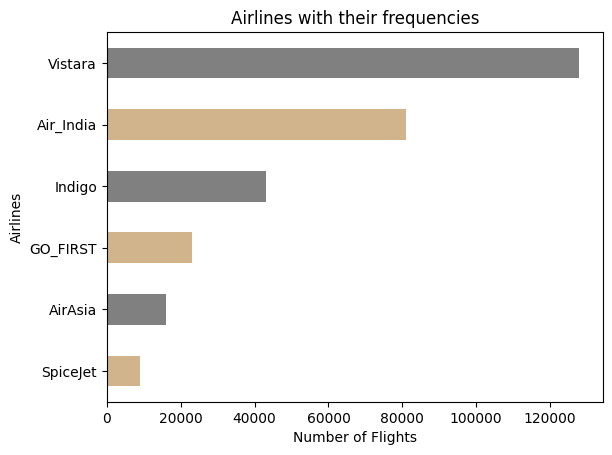

In [81]:
#Plotting all the airlines with their Number of flights in a bar graph

airline_data["airline"].value_counts(ascending=True).plot.barh(color = ["tan", "gray"])

plt.title("Airlines with their frequencies")
plt.xlabel("Number of Flights")
plt.ylabel("Airlines")

plt.show()

Show Bar Graphs representing the Departure Time & Arrival Time

In [45]:
#Showing the departure time for the flights

airline_data["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [46]:
#Showing the arrival time for the flights

airline_data["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

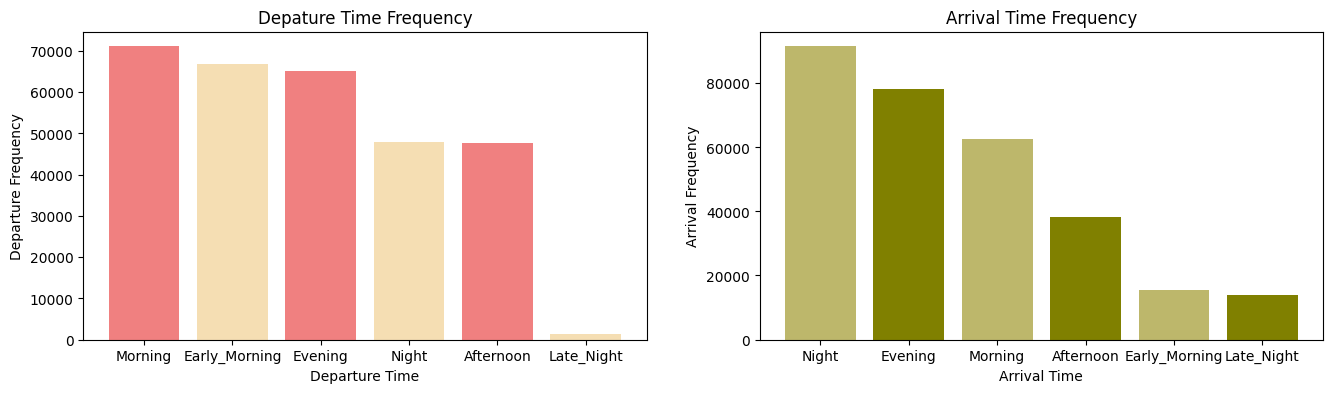

In [84]:
#Plotting the arrival and departure time for the flights with their counts

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(airline_data["departure_time"].value_counts().index, airline_data["departure_time"].value_counts().values, color=["lightcoral", "wheat"])
plt.title("Depature Time Frequency")
plt.xlabel("Departure Time")
plt.ylabel("Departure Frequency")

plt.subplot(1, 2, 2)

plt.bar(airline_data["arrival_time"].value_counts().index, airline_data["arrival_time"].value_counts().values, color= ["darkkhaki", "olive"])
plt.title("Arrival Time Frequency")
plt.xlabel("Arrival Time")
plt.ylabel("Arrival Frequency")

plt.show()


Show Bar Graphs representing the Source City & Destination City

In [52]:
#Listing all the source cities for a flight

airline_data["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [53]:
#Listing all the destination cities

airline_data["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

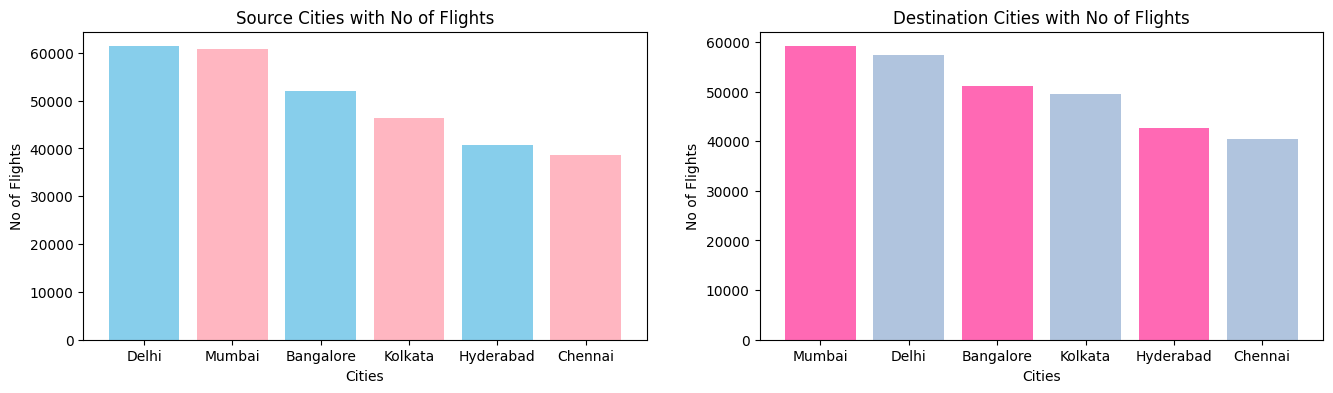

In [60]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)

plt.bar(airline_data["source_city"].value_counts().index, airline_data["source_city"].value_counts().values, color = ["skyblue", "lightpink"])
plt.title("Source Cities with No of Flights")
plt.xlabel("Cities")
plt.ylabel("No of Flights")

plt.subplot(1, 2, 2)

plt.bar(airline_data["destination_city"].value_counts().index, airline_data["destination_city"].value_counts().values, color = ["hotpink", "lightsteelblue"])
plt.title("Destination Cities with No of Flights")
plt.xlabel("Cities")
plt.ylabel("No of Flights")

plt.show()


Does price varies with airlines ?

In [66]:
#Grouping the airlines and checking their mean

airline_data.groupby("airline")["price"].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

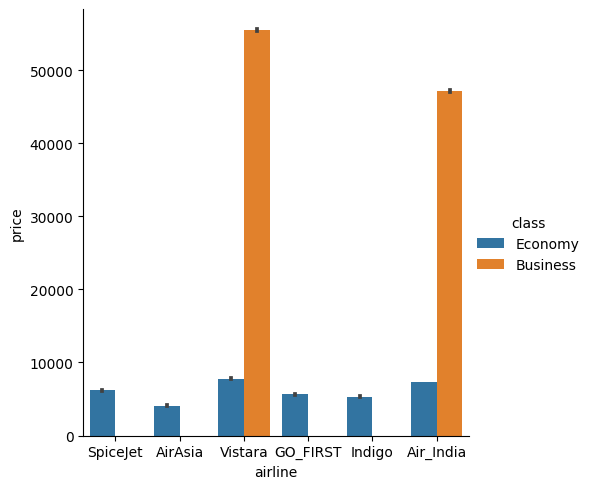

In [86]:
#Displaying a categorical plot showing the mean ticket price for each airline

plt.figure(figsize=(8, 4))
sns.catplot(x='airline', y='price', kind="bar", data=airline_data, hue='class')

plt.show()

Does ticket price change based on the departure time and arrival time?

In [87]:
#Checking the mean ticket price based on departure time

airline_data.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [88]:
#Checking the mean ticket price based on the arrival time

airline_data.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

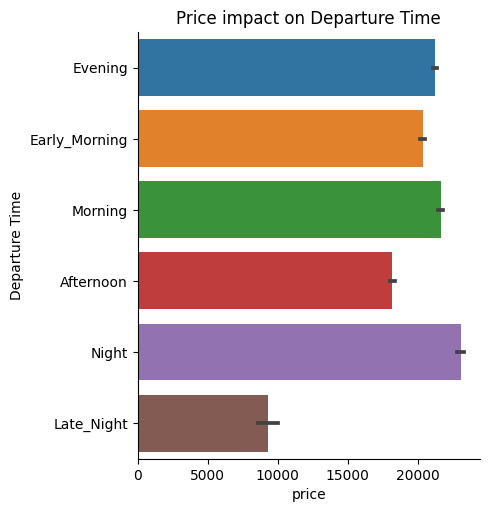

In [111]:
plt.figure(figsize=(16, 8))
sns.catplot(x='price', y='departure_time', data=airline_data, kind='bar')
plt.title("Price impact on Departure Time")
plt.ylabel("Departure Time")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

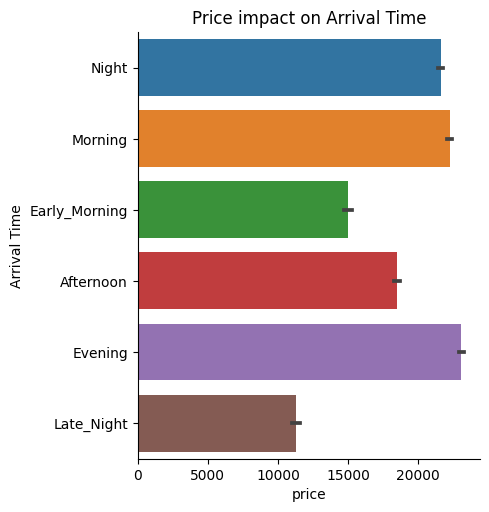

In [109]:
plt.figure(figsize=(16, 8))

sns.catplot(x='price', y='arrival_time', data=airline_data, kind='bar')
plt.title("Price impact on Arrival Time")
plt.ylabel("Arrival Time")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

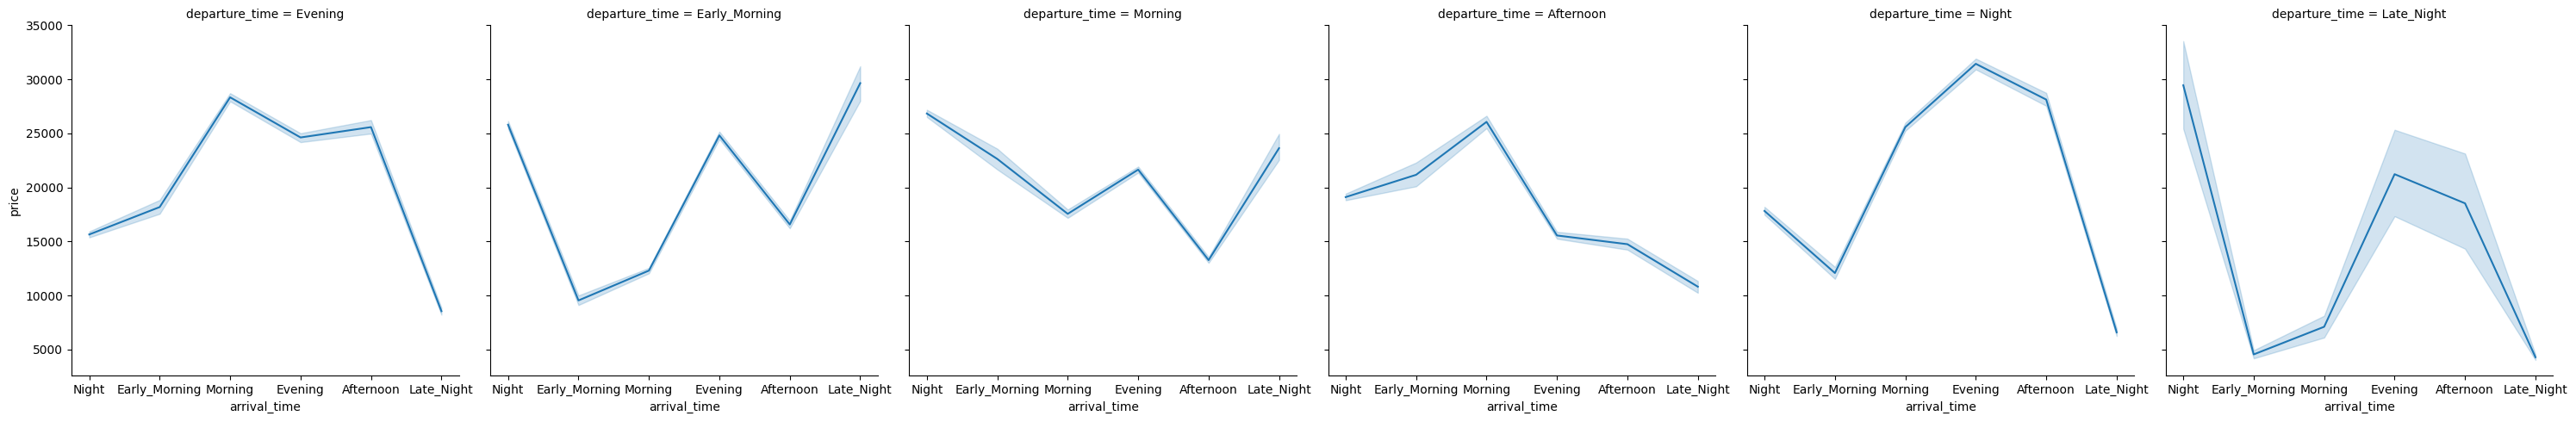

In [112]:
sns.relplot(x= 'arrival_time', y='price', data = airline_data, col='departure_time', kind='line')

How the price changes with change in Source and Destination?

In [113]:
#Checking mean ticket price for each source city

airline_data.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [114]:
#Checking the mean ticket price for each destination city

airline_data.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

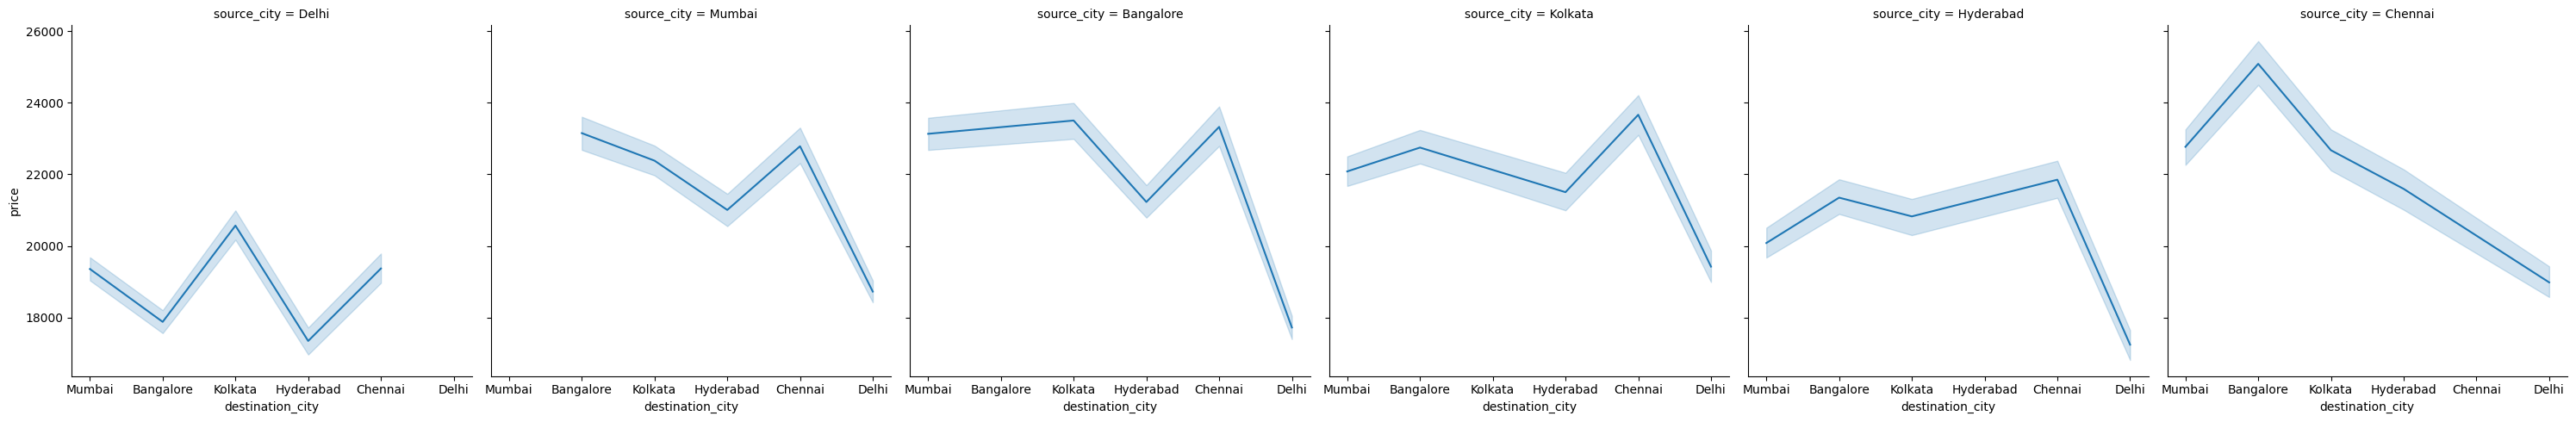

In [116]:
sns.relplot(x='destination_city', y='price', data=airline_data, col='source_city', kind='line')

 How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [117]:
airline_data.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [118]:
airline_data['days_left'].nunique()

49

In [119]:
airline_data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [120]:
#Checking mean ticket price for different days left

airline_data.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x400 with 0 Axes>

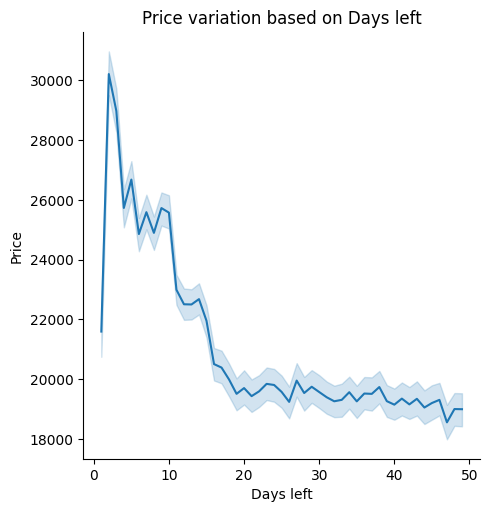

In [123]:
plt.figure(figsize=(16,4))

sns.relplot(x='days_left', y='price', data=airline_data, kind='line')

plt.title("Price variation based on Days left")
plt.xlabel("Days left")
plt.ylabel("Price")
plt.show()

How does the ticket price vary between Economy and Business class?

In [125]:
airline_data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [126]:
# Filtering the records with Economy class and printing mean price

economy = airline_data[airline_data['class'] == "Economy"]
economy

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
206661   Vistara   UK-832     Chennai  Early_Morning   one          Night   
206662   Vistara   UK-832     Chennai  Early_Morning   one          Night   
206663   Vistara   UK-826     Chennai      Afternoon   one        Morning   
206664   Vistara   UK-822     Chennai        Morning   one        Morning   
206665   Vistara   UK-824     Chennai          Night   one          Night   

       destination_city    class  duration  days_left  price  
0                Mumbai  Economy      2.17          1   5953  
1                Mumbai  Economy      2.33          1   5953  
2                Mumbai  Economy      2.17          1   5956  
3                Mumbai  Economy      2.25          1   5955  
4                Mumbai  Economy      2.33          1   5955  
...                 ...      ...       ...        ...    ...  
206661        Hyderabad  Economy     13.83         49   7697  
206662        Hyderabad  Economy     13.83         49   7709  
206663        Hyderabad  Economy     20.58         49   8640  
206664        Hyderabad  Economy     23.33         49   8640  
206665        Hyderabad  Economy     24.42         49   8640  

[206666 rows x 11 columns]

In [128]:
economy.price.mean()

6572.342383362527

In [129]:
business = airline_data[airline_data['class'] == "Business"]

business

airline  flight source_city departure_time stops arrival_time  \
206666  Air_India  AI-868       Delhi        Evening  zero      Evening   
206667  Air_India  AI-624       Delhi        Evening  zero        Night   
206668  Air_India  AI-531       Delhi        Evening   one        Night   
206669  Air_India  AI-839       Delhi          Night   one        Night   
206670  Air_India  AI-544       Delhi        Evening   one        Night   
...           ...     ...         ...            ...   ...          ...   
300148    Vistara  UK-822     Chennai        Morning   one      Evening   
300149    Vistara  UK-826     Chennai      Afternoon   one        Night   
300150    Vistara  UK-832     Chennai  Early_Morning   one        Night   
300151    Vistara  UK-828     Chennai  Early_Morning   one      Evening   
300152    Vistara  UK-822     Chennai        Morning   one      Evening   

       destination_city     class  duration  days_left  price  
206666           Mumbai  Business      2.00          1  25612  
206667           Mumbai  Business      2.25          1  25612  
206668           Mumbai  Business     24.75          1  42220  
206669           Mumbai  Business     26.50          1  44450  
206670           Mumbai  Business      6.67          1  46690  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[93487 rows x 11 columns]

In [130]:
business.price.mean()

52540.08112357868

What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [132]:
requested_data = airline_data[(airline_data['airline'] == "Vistara") & (airline_data['source_city'] == "Delhi") & (airline_data['destination_city'] == "Hyderabad") & (airline_data['class'] == "Business")]

requested_data

airline  flight source_city departure_time stops   arrival_time  \
219123  Vistara  UK-871       Delhi          Night  zero          Night   
219124  Vistara  UK-879       Delhi        Evening  zero        Evening   
219129  Vistara  UK-955       Delhi        Evening   one          Night   
219130  Vistara  UK-955       Delhi        Evening   one      Afternoon   
219131  Vistara  UK-985       Delhi        Evening   one          Night   
...         ...     ...         ...            ...   ...            ...   
221863  Vistara  UK-963       Delhi        Morning   one  Early_Morning   
221864  Vistara  UK-985       Delhi        Evening   one  Early_Morning   
221865  Vistara  UK-985       Delhi        Evening   one      Afternoon   
221866  Vistara  UK-955       Delhi        Evening   one  Early_Morning   
221867  Vistara  UK-955       Delhi        Evening   one      Afternoon   

       destination_city     class  duration  days_left  price  
219123        Hyderabad  Business      2.33          1  30630  
219124        Hyderabad  Business      2.25          1  38470  
219129        Hyderabad  Business     27.17          1  63513  
219130        Hyderabad  Business     18.50          1  65764  
219131        Hyderabad  Business     25.08          1  69113  
...                 ...       ...       ...        ...    ...  
221863        Hyderabad  Business     23.00         49  53937  
221864        Hyderabad  Business     12.00         49  59537  
221865        Hyderabad  Business     16.42         49  59537  
221866        Hyderabad  Business     14.08         49  61889  
221867        Hyderabad  Business     18.50         49  61889  

[1660 rows x 11 columns]

In [134]:
requested_data.price.mean()

47939.840361445786